<a href="https://colab.research.google.com/github/Harsha-2005/Elevate-Labs-AI-and-ML-Internship/blob/main/Elevate_Labs_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly we are importing the libraries that are required to complete the Task-1

Libraries used:
1.Numpy -> Handling and processing the numerical data efficiently
2.Pandas -> It is used for data manipulation and analysis
3.Matplot -> creating visualizations,turning the data into various types of charts and graphs
4.Seaborn -> creating attractive and informative statistical graphics in python

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

We are reading the data set using the pandas library


In [55]:
df=pd.read_csv("Titanic-Dataset.csv")

In [56]:
# Display the first 5 rows to check the data
print("--- First 5 Rows ---")
print(df.head())

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [57]:
# Display a concise summary (column names, data types, non-null counts)
print("--- Dataset Info ---")
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
# Display descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
print("--- Descriptive Statistics ---")
print(df.describe())

--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [59]:
#It tells us about the how many null values are present in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [60]:
#Handling the null values for the 'Age' column
age_mean=df['Age'].mean()
df['Age']=df['Age'].fillna(age_mean)

In [61]:
#we are finding the mode of the embarked column
embarked_mode=df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode)


,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [62]:
#we are dropping the colum of the cabin because it has many missing values
df.drop('Cabin',axis=1,inplace=True)

In [63]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [64]:
#We are encoding the 'Sex'
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [65]:
df=pd.get_dummies(df,columns=['Embarked'],prefix='Embarked',drop_first=False)
df_unscaled=df.copy()


In [66]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
print("Dropped 'PassengerId','Name' and 'Ticket' columns.")


Dropped 'PassengerId','Name' and 'Ticket' columns.


   -> Boxplots saved to 'outlier_visualization.png'
   -> Shape before removing outliers: (891, 10)
   -> Shape after removing outliers:  (721, 10)
   -> Total rows removed: 170


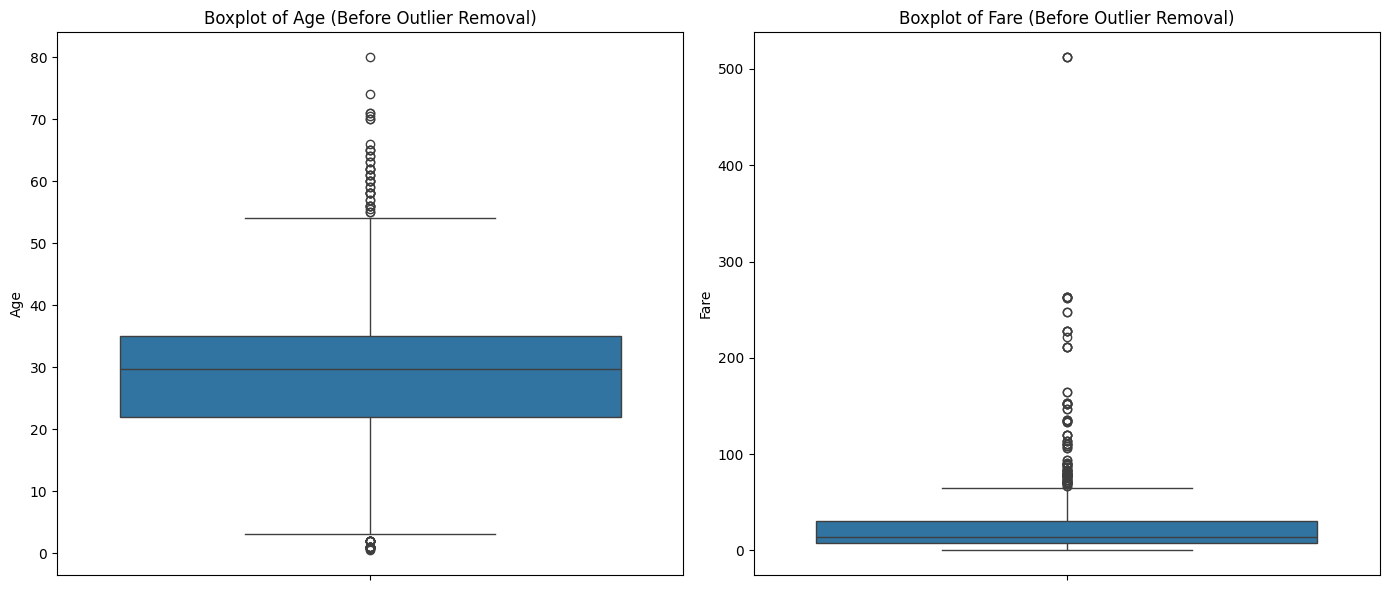

In [67]:
#outlier visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_unscaled['Age'])
plt.title('Boxplot of Age (Before Outlier Removal)')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_unscaled['Fare'])
plt.title('Boxplot of Fare (Before Outlier Removal)')
plt.ylabel('Fare')

plt.tight_layout()
plt.savefig('outlier_visualization.png')
print("   -> Boxplots saved to 'outlier_visualization.png'")



#Removing outliers using the IQR method
print(f"   -> Shape before removing outliers: {df.shape}")

# Calculate IQR for 'Age' and 'Fare' from the unscaled data
Q1_age = df_unscaled['Age'].quantile(0.25)
Q3_age = df_unscaled['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

Q1_fare = df_unscaled['Fare'].quantile(0.25)
Q3_fare = df_unscaled['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Get the indices of rows that are NOT outliers
non_outlier_indices = df_unscaled[
    (df_unscaled['Age'] >= lower_bound_age) & (df_unscaled['Age'] <= upper_bound_age) &
    (df_unscaled['Fare'] >= lower_bound_fare) & (df_unscaled['Fare'] <= upper_bound_fare)
].index

# Filter the main dataframe to keep only the non-outlier rows
df = df.loc[non_outlier_indices]
print(f"   -> Shape after removing outliers:  {df.shape}")
print(f"   -> Total rows removed: {len(df_unscaled) - len(df)}")



In [68]:

# Normalize/standardize the numerical features
# Note: We do this AFTER removing outliers for a more accurate scaling
features_to_scale = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("\n✅ Step 4: Numerical features standardized successfully!")


# --- Final Output ---
# Save the fully processed and cleaned data to a new CSV file
final_file_path = "Titanic-Dataset-Final-Processed.csv"
df.to_csv(final_file_path, index=False)

print(f"\n🎉 All steps complete! The final, processed data has been saved to '{final_file_path}'")
print("\n--- First 5 Rows of the Final Dataset ---")
print(df.head())


✅ Step 4: Numerical features standardized successfully!

🎉 All steps complete! The final, processed data has been saved to 'Titanic-Dataset-Final-Processed.csv'

--- First 5 Rows of the Final Dataset ---
   Survived    Pclass  Sex       Age     SibSp     Parch      Fare  \
0         0  0.685208    0 -0.645253  0.685904 -0.410103 -0.748128   
2         1  0.685208    1 -0.246708 -0.485984 -0.410103 -0.698326   
3         1 -2.105950    1  0.650019  0.685904 -0.410103  2.634730   
4         0  0.685208    0  0.650019 -0.485984 -0.410103 -0.689103   
5         0  0.685208    0  0.121859 -0.485984 -0.410103 -0.658978   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
2       False       False        True  
3       False       False        True  
4       False       False        True  
5       False        True       False  
